# Image Recognition using CNN on CIFAR-10 Dataset

In this project we will be using CIFAR-10 dataset. This dataset includes thousands of pictures of 10 different kinds of objects like airplanes, automobiles, birds and so on.

Each image in the dataset includes a matching label so we know what kind of image it is.

The images in the CIFAR-10 dataset are only 32x32 pixels.

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from tensorflow.keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [2]:
(X_train,y_train),(X_test, y_test)=cifar10.load_data()

Normalize the data

In [3]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

Convert class vectors to binary class matrices

In [4]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Compile the model

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                       

In [7]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=12,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/12


1563/1563 [==============================] - 113s 70ms/step - loss: 1.5263 - accuracy: 0.4438 - val_loss: 1.1516 - val_accuracy: 0.5893
Epoch 2/12
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1363 - accuracy: 0.5954 - val_loss: 0.9808 - val_accuracy: 0.6573
Epoch 3/12
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9927 - accuracy: 0.6508 - val_loss: 0.9297 - val_accuracy: 0.6723
Epoch 4/12
1563/1563 [==============================] - 89s 57ms/step - loss: 0.9105 - accuracy: 0.6826 - val_loss: 0.8158 - val_accuracy: 0.7172
Epoch 5/12
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8433 - accuracy: 0.7049 - val_loss: 0.7583 - val_accuracy: 0.7342
Epoch 6/12
1563/1563 [==============================] - 111s 71ms/step - loss: 0.8013 - accuracy: 0.7206 - val_loss: 0.7288 - val_accuracy: 0.7478
Epoch 7/12
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7683 - accuracy: 0.7299 - val_loss: 0.7

Save the neural network architecture

In [8]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

6342

Save the trained neural network weights

In [9]:
model.save_weights("model_weight.h5")

Making Predictions on the images

In [10]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [11]:
class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

load the json file that contains the mdoel structure

In [12]:
f=Path("model_structure.json")
model_structure=f.read_text()

Recreate the keras modeel bject from the json data

In [13]:
model=model_from_json(model_structure)

reload the model training weights

In [14]:
model.load_weights("model_weight.h5")

Load an image file to test

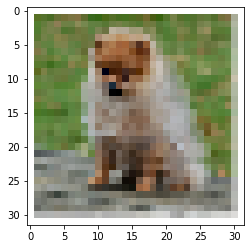

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img=load_img("dog.png",target_size=(32,32))
plt.imshow(img)

Convert the image to a numpy array

In [16]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)

In [17]:
list_of_images=np.expand_dims(image_to_test,axis=0)

make predictions using the model

In [19]:
results=model.predict(list_of_images)

1/1 [==============================] - 0s 286ms/step


since we are only testing one image, we only need to check the first result

In [20]:
single_result=results[0]

We will get a likeliood score for all 10 possible classes. Find out which class has the highest score

In [21]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]

Get the name of the most likely class

In [22]:
class_label=class_labels[most_likely_class_index]

Print the result

In [23]:
print("This is a image is a {} likelihood: {:2f}".format(class_label, class_likelihood))

This is a image is a Dog likelihood: 1.000000


# Sentiment Classification using NLP and Classification Algorithm

Sentiment Analysis is a means to identofy the view or emotion behind a situation.

It basically means to analyse and find the emotion or intent behind a piece of text or speech or any model of communication.

This burger has a very bad taste- negative review

I ordered this pizza today- nutral sentiment/review

I love this cheese sandwich, its so delicious- positive review

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix

In [39]:
df_train=pd.read_csv("train.txt",delimiter=";",names=['text','label'])
df_val=pd.read_csv("val.txt",delimiter=";",names=['text','label'])

In [40]:
df=pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [41]:
print("Shape of the dataframe: ",df.shape)
df.sample(5)

Shape of the dataframe:  (18000, 2)


,text,label
5712,i plan to run miles in the morning which is a ...,love
11294,i told him that if he touched me with a needle...,anger
3095,i think this will help somebody out there that...,sadness
7131,i feel like my dream of being a good guitarist...,joy
9647,i feel this way about all relationships romant...,love


<AxesSubplot:xlabel='label', ylabel='count'>

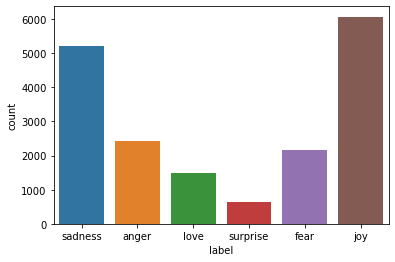

In [42]:
import warnings
warnings.filterwarnings("ignore")

sns.countplot(df.label)

Positve Sentiment- joy, love, surprise

Negative sentiment- anger, sadness, fear

Now we will create a custom encoder to convert categorical target labels to numerical i.e 0 and 1

In [43]:
def custom_encoder(df):
    df.replace(to_replace="surprise",value=1, inplace=True)
    df.replace(to_replace="love",value=1, inplace=True)
    df.replace(to_replace="joy",value=1, inplace=True)
    df.replace(to_replace="fear",value=0, inplace=True)
    df.replace(to_replace="anger",value=0, inplace=True)
    df.replace(to_replace="sadness",value=0, inplace=True)

In [44]:
custom_encoder(df['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

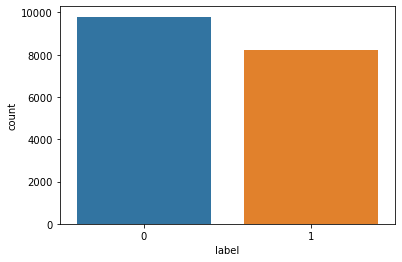

In [45]:
sns.countplot(df.label)

Preprocessing Steps

Get rid of any characters apart from alphabets

Convert the string to lowercase because Python is case-sensitive

3 Check and remove the stopwords

Perform lemmatization

In [48]:
lm=WordNetLemmatizer()

In [49]:
def text_transformation(df_col):
    corpus=[]
    for item in df_col:
        new_item=re.sub('[^a-zA-Z]',' ',str(item))
        new_item=new_item.lower()
        new_item=new_item.split()
        new_item=[lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [50]:
corpus=text_transformation(df['text'])

In [51]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)
X=traindata
y=df.label

Now we will fit the data into grid search and view the best parameters using the best_params attribute

In [52]:
parameters={'max_features':('auto','sqrt'),
            'n_estimators':[5,10],
            'max_depth':[10,None],
            'min_samples_split':[5],
            'min_samples_leaf':[1],
            'bootstrap':[True]
           }

In [53]:
grid_search=GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

We can view all the models and their respective parameters, mean test score and rank as GridSearch CV

In [54]:
for i in range(8):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print("Rank: ",grid_search.cv_results_['rank_test_score'])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test Score:  0.5970000000000001
Rank:  [7 6 8 5 4 2 3 1]
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean test Score:  0.6148333333333333
Rank:  [7 6 8 5 4 2 3 1]
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test Score:  0.5953888888888889
Rank:  [7 6 8 5 4 2 3 1]
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean test Score:  0.6165
Rank:  [7 6 8 5 4 2 3 1]
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test Score:  0.9119444444444443
Rank:  [7 6 8 5 4 2 3 1

Now we will choose the best parameter obtained from GridSearchCV and create a final random forest classifier model and then train our model.

In [55]:
rfc= RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                           max_depth=grid_search.best_params_['max_depth'],
                           n_estimators=grid_search.best_params_['n_estimators'],
                           min_samples_split=grid_search.best_params_['min_samples_split'],
                           min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                           bootstrap=grid_search.best_params_['bootstrap'])

rfc.fit(X,y)

RandomForestClassifier(max_features='sqrt', min_samples_split=5,
                       n_estimators=10)

Test Data Transformation

In [56]:
test_df=pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [57]:
X_test, y_test=test_df.text, test_df.label

# encode the labels into two classes 0 and 1
test_df= custom_encoder(y_test)

# preprocessing of text
test_corpus=text_transformation(X_test)

# convert the text data into vectors
testdata=cv.transform(test_corpus)

#predict the target
predictions=rfc.predict(testdata)

Model Evaluation

We will evaluate our model using various metrics such as accuracy score, precision score, recall score confusion matrix.

In [58]:
acc_score= accuracy_score(y_test, predictions)
pre_score= precision_score(y_test, predictions)
rec_score=recall_score(y_test, predictions)

print('Accuracy Score:',acc_score)
print("Precision Score:",pre_score)
print('Recall Score',rec_score)

print("-"*50)

cr=classification_report(y_test, predictions)
print(cr)

Accuracy Score: 0.9485
Precision Score: 0.9584736251402918
Recall Score 0.9282608695652174
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1080
           1       0.96      0.93      0.94       920

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



ROC Curve- We will plot probability of the class using the predict_proba() method of random forest classifier and then we will plot the cureve

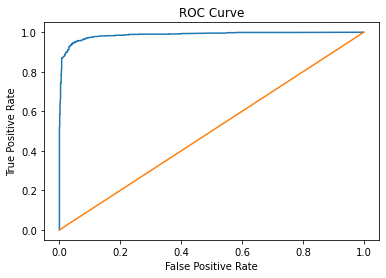

In [59]:
predictions_probability= rfc.predict_proba(testdata)
fpr,tpr,thresholds=roc_curve(y_test, predictions_probability[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we cna see that our model performed very well in classifying the sentiments, with an accuracy score, precision score and recall score of approx 96%.

Now we will check for custom input as well and let our model identify the sentiment of the input statement.

In [60]:
def expression_check(prediction_input):
    if prediction_input==0:
        print("Input statement has negative sentiment")
    elif prediction_input==1:
        print("Input statement has positive sentiment")
    else:
        print("Invalid Statement")

Function to take the input statement and performs the same transformation as we did earlier

In [61]:
def sentiment_predictor(input):
    input=text_transformation(input)
    transformed_input=cv.transform(input)
    prediction=rfc.predict(transformed_input)
    expression_check(prediction)

In [62]:
input1=["Sometimes I just don't want to go out"]
input2=["I bought a new phone and it's so good"]

In [63]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has negative sentiment
Input statement has positive sentiment


# Chatbot using NLP and Neural Networks in Python

Tag means classes

Patterns means what user is going to ask

Response is chatbot response

In [64]:
data={"intents":[
    {"tag":"greeting",
     "patterns":["Hello","How are you?","Hi There","Hi","What's up"],
     "responses":["Howdy Partner!","Hello","How are you doing?","Greetings!","How do you do"]
        },
    {"tag":"age",
     "patterns":["how old are you","when is your birthday","when was you born"],
     "responses":["I am 24 years old","I was born in 1966","My birthday is July 3rd and I was born in 1996","03/07/1996"]
        },
    {"tag":"date",
     "patterns":["what are you doing this weekend",
                "do you want to hangout sometime?","what are your plans for this week"],
     "responses":["I am available this week","I don't have any plans","I am not busy"]
        },
    {"tag":"name",
     "patterns":["what's your name","what are you called","who are you"],
     "responses":["My name is Kippi","I'm Kippi","Kippi"]
        },
    {"tag":"goodbye",
     "patterns":["bye","g2g","see ya","adios","cya"],
     "responses":["It was nice speaking to you","See you later","Speak Soon"]
        },
]}

For each tag we created, we would specify patterns. Essentially this defines the different ways of how a user may pose a query to the chatbot.

The chatbot would then take these patterns and use them as training data to determine what someone is asking and the chatbot response would be relevant to that qustion.

In [65]:
import json
import string
import random

import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to C:\Users\Mohit
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohit
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In order to create our training data below steps to be followed

Create a vocabulary of all the words used in the patterns

Create a list of the classes- tage of ach intent

Create a list of all the patterns within the intents file

Create a list of all the associated tags to go with each patterns in the intents file.

Initialising lemmatier to get stem of words

In [66]:
lemmatizer=WordNetLemmatizer()

words=[]
classes=[]
doc_x=[]
doc_y=[]

Loop through all the intents

Tokenize each patter and append token to words, the patterns and the associated tag to their associated list

In [67]:
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens=nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_x.append(pattern)
        doc_y.append(intent["tag"])
    if intent["tag"] not in classes:
        classes.append(intent["tag"])

Lemmatize all the words in the vocab and convert them to lowercase

In [68]:
words=[lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]

Sorting the vocab and classes in alphabeical order and taking the set to ensure no duplicates occur

In [69]:
words=sorted(set(words))
classes=sorted(set(classes))

In [70]:
print(words)

["'s", 'adios', 'are', 'birthday', 'born', 'bye', 'called', 'cya', 'do', 'doing', 'for', 'g2g', 'hangout', 'hello', 'hi', 'how', 'is', 'name', 'old', 'plan', 'see', 'sometime', 'there', 'this', 'to', 'up', 'wa', 'want', 'week', 'weekend', 'what', 'when', 'who', 'ya', 'you', 'your']


In [71]:
print(classes)

['age', 'date', 'goodbye', 'greeting', 'name']


In [72]:
print(doc_x)

['Hello', 'How are you?', 'Hi There', 'Hi', "What's up", 'how old are you', 'when is your birthday', 'when was you born', 'what are you doing this weekend', 'do you want to hangout sometime?', 'what are your plans for this week', "what's your name", 'what are you called', 'who are you', 'bye', 'g2g', 'see ya', 'adios', 'cya']


In [73]:
print(doc_y)

['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'age', 'age', 'age', 'date', 'date', 'date', 'name', 'name', 'name', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye']


List for training data

In [74]:
training=[]
out_empty=[0]*len(classes)

# creating a bag of words model

for idx, doc in enumerate(doc_x):
    bow=[]
    text=lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    output_row=list(out_empty)
    output_row[classes.index(doc_y[idx])]=1

    training.append([bow, output_row])

random.shuffle(training)

training=np.array(training,dtype=object)

train_X=np.array(list(training[:,0]))
train_y=np.array(list(training[:,1]))

In [76]:
train_X[:2]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [77]:
train_y[:2]

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [78]:
input_shape=(len(train_X[0]),)
output_shape=len(train_y[0])

epochs=500

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a Sequential model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation='softmax'))

# Create the Adam optimizer with a specified learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model using the Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               4736      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 13317 (52.02 KB)
Trainable params: 13317 (52.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [80]:
model.fit(x=train_X, y=train_y, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 1.6191 - accuracy: 0.1053
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 1.5498 - accuracy: 0.3158
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 1.3489 - accuracy: 0.5789
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 1.2536 - accuracy: 0.6842
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 1.1208 - accuracy: 0.8421
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 1.0863 - accuracy: 0.7368
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 1.0991 - accuracy: 0.6842
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8308 - accuracy: 0.8421
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6025 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4572 - accuracy: 0.9474
Epoch 11/500
1/1 [===

1/1 [==============================] - 0s 43ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 84/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 85/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0805 - accuracy: 0.9474
Epoch 86/500
1/1 [==============================] - 0s 38ms/step - loss: 6.5153e-05 - accuracy: 1.0000
Epoch 87/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 88/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1085 - accuracy: 0.9474
Epoch 89/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 90/500
1/1 [==============================] - 0s 49ms/step - loss: 4.0553e-04 - accuracy: 1.0000
Epoch 91/500
1/1 [==============================] - 0s 43ms/step - loss: 1.3413e-04 - accuracy: 1.0000
Epoch 92/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 93/50

1/1 [==============================] - 0s 35ms/step - loss: 4.6595e-04 - accuracy: 1.0000
Epoch 164/500
1/1 [==============================] - 0s 33ms/step - loss: 1.4523e-04 - accuracy: 1.0000
Epoch 165/500
1/1 [==============================] - 0s 35ms/step - loss: 2.3223e-04 - accuracy: 1.0000
Epoch 166/500
1/1 [==============================] - 0s 34ms/step - loss: 1.4504e-04 - accuracy: 1.0000
Epoch 167/500
1/1 [==============================] - 0s 31ms/step - loss: 6.1855e-05 - accuracy: 1.0000
Epoch 168/500
1/1 [==============================] - 0s 32ms/step - loss: 1.7515e-04 - accuracy: 1.0000
Epoch 169/500
1/1 [==============================] - 0s 29ms/step - loss: 3.2498e-04 - accuracy: 1.0000
Epoch 170/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 171/500
1/1 [==============================] - 0s 29ms/step - loss: 2.9982e-04 - accuracy: 1.0000
Epoch 172/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0014 -

1/1 [==============================] - 0s 27ms/step - loss: 1.7334e-05 - accuracy: 1.0000
Epoch 243/500
1/1 [==============================] - 0s 35ms/step - loss: 4.6928e-05 - accuracy: 1.0000
Epoch 244/500
1/1 [==============================] - 0s 23ms/step - loss: 1.6443e-05 - accuracy: 1.0000
Epoch 245/500
1/1 [==============================] - 0s 42ms/step - loss: 1.1636e-04 - accuracy: 1.0000
Epoch 246/500
1/1 [==============================] - 0s 25ms/step - loss: 2.2429e-05 - accuracy: 1.0000
Epoch 247/500
1/1 [==============================] - 0s 26ms/step - loss: 8.8405e-05 - accuracy: 1.0000
Epoch 248/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 249/500
1/1 [==============================] - 0s 30ms/step - loss: 9.0938e-05 - accuracy: 1.0000
Epoch 250/500
1/1 [==============================] - 0s 27ms/step - loss: 4.5612e-06 - accuracy: 1.0000
Epoch 251/500
1/1 [==============================] - 0s 21ms/step - loss: 1.5911e-

1/1 [==============================] - 0s 6ms/step - loss: 3.1207e-05 - accuracy: 1.0000
Epoch 322/500
1/1 [==============================] - 0s 6ms/step - loss: 9.7615e-04 - accuracy: 1.0000
Epoch 323/500
1/1 [==============================] - 0s 20ms/step - loss: 3.4083e-05 - accuracy: 1.0000
Epoch 324/500
1/1 [==============================] - 0s 20ms/step - loss: 3.3951e-05 - accuracy: 1.0000
Epoch 325/500
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 326/500
1/1 [==============================] - 0s 22ms/step - loss: 1.1586e-04 - accuracy: 1.0000
Epoch 327/500
1/1 [==============================] - 0s 17ms/step - loss: 1.4983e-04 - accuracy: 1.0000
Epoch 328/500
1/1 [==============================] - 0s 18ms/step - loss: 3.0557e-05 - accuracy: 1.0000
Epoch 329/500
1/1 [==============================] - 0s 30ms/step - loss: 9.9441e-05 - accuracy: 1.0000
Epoch 330/500
1/1 [==============================] - 0s 21ms/step - loss: 7.1732e-04

1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 401/500
1/1 [==============================] - 0s 29ms/step - loss: 6.1221e-05 - accuracy: 1.0000
Epoch 402/500
1/1 [==============================] - 0s 23ms/step - loss: 5.6038e-05 - accuracy: 1.0000
Epoch 403/500
1/1 [==============================] - 0s 27ms/step - loss: 2.4505e-05 - accuracy: 1.0000
Epoch 404/500
1/1 [==============================] - 0s 25ms/step - loss: 1.4612e-04 - accuracy: 1.0000
Epoch 405/500
1/1 [==============================] - 0s 23ms/step - loss: 3.8948e-04 - accuracy: 1.0000
Epoch 406/500
1/1 [==============================] - 0s 22ms/step - loss: 4.8231e-05 - accuracy: 1.0000
Epoch 407/500
1/1 [==============================] - 0s 29ms/step - loss: 1.1532e-04 - accuracy: 1.0000
Epoch 408/500
1/1 [==============================] - 0s 24ms/step - loss: 3.0210e-05 - accuracy: 1.0000
Epoch 409/500
1/1 [==============================] - 0s 17ms/step - loss: 9.4112e-

1/1 [==============================] - 0s 18ms/step - loss: 2.7471e-05 - accuracy: 1.0000
Epoch 480/500
1/1 [==============================] - 0s 19ms/step - loss: 4.7470e-05 - accuracy: 1.0000
Epoch 481/500
1/1 [==============================] - 0s 19ms/step - loss: 1.0961e-04 - accuracy: 1.0000
Epoch 482/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3452e-04 - accuracy: 1.0000
Epoch 483/500
1/1 [==============================] - 0s 17ms/step - loss: 2.5159e-06 - accuracy: 1.0000
Epoch 484/500
1/1 [==============================] - 0s 12ms/step - loss: 1.6418e-04 - accuracy: 1.0000
Epoch 485/500
1/1 [==============================] - 0s 17ms/step - loss: 1.0320e-05 - accuracy: 1.0000
Epoch 486/500
1/1 [==============================] - 0s 20ms/step - loss: 5.4511e-05 - accuracy: 1.0000
Epoch 487/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 488/500
1/1 [==============================] - 0s 17ms/step - loss: 6.5250e-

In [81]:
def clean_text(text):
    tokens=nltk.word_tokenize(text)
    tokens=[lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def bag_of_words(text,vocab):
    tokens=clean_text(text)
    bow=[0]*len(vocab)
    for w in tokens:
        for idx, word in enumerate(vocab):
            if word==w:
                bow[idx]=1
    return np.array(bow)

In [82]:
def pred_class(text, vocab,labels):
    bow=bag_of_words(text, vocab)
    result=model.predict(np.array([bow]))[0]
    thresh=0.2
    y_pred=[[idx,res] for idx, res in enumerate(result) if res>thresh]

    y_pred.sort(key=lambda x:x[1], reverse=True)
    return_list=[]
    for r in y_pred:
        return_list.append(labels[r[0]])
    return return_list

def get_response(intents_list, intents_json):
    tag=intents_list[0]
    list_of_intents=intents_json["intents"]
    for i in list_of_intents:
        if i["tag"]==tag:
            result=random.choice(i["responses"])
            break
    return result

Running the chatbot

In [83]:
while True:
    message=input("")
    intents=pred_class(message, words, classes)
    result=get_response(intents,data)
    print(result)

hello
1/1 [==============================] - 0s 371ms/step
Hello
what is your name
1/1 [==============================] - 0s 54ms/step
My name is Kippi
goodbye
1/1 [==============================] - 0s 79ms/step
See you later


KeyboardInterrupt: Interrupted by user